# Decision Tree tutorial

## 초기 설정

In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import pandas as pd

## Classification

### 데이터 로드

In [2]:
# scikit-learn의 유방암 데이터 셋 사용
breast_cancer_data = load_breast_cancer()

In [3]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
# 클래스는 악성과 양성으로 나누어짐
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

### 데이터 전처리

In [5]:
X = pd.DataFrame(breast_cancer_data.data)
y = pd.DataFrame(breast_cancer_data.target)

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [8]:
# 학습/테스트 데이터 분류 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

### 모델 생성 및 평가

In [9]:
classification_tree = DecisionTreeClassifier(random_state=3)
classification_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [10]:
# 학습/테스트 데이터에 대해 성능 평가
print(f'Train set accuracy: {classification_tree.score(X_train, y_train):.3f}')
print(f'Test set accuracy: {classification_tree.score(X_test, y_test):.3f}')

Train set accuracy: 1.000
Test set accuracy: 0.904


학습 데이터의 경우 높은 성능을 보이지만, 과적합으로 인해 테스트 셋에 대해서는 낮은 성능을 보임

In [11]:
# 과적합 방지를 위해 사전 가지치기(pre-pruning)을 적용(max_depth=4)
classification_tree = DecisionTreeClassifier(max_depth=4, random_state=3)
classification_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=3)

In [12]:
print(f'Train set accuracy: {classification_tree.score(X_train, y_train):.3f}')
print(f'Test set accuracy: {classification_tree.score(X_test, y_test):.3f}')

Train set accuracy: 0.976
Test set accuracy: 0.930


학습 데이터 성능은 낮아졌지만, 테스트 데이터 성능이 높아짐

### 특성 중요도 평가

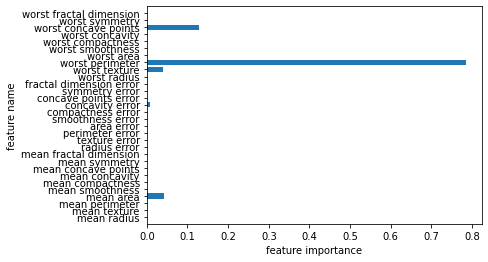

In [13]:
def plot_feature_importance(data, model):
    n_features = len(data.feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(range(n_features), data.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature name')
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importance(breast_cancer_data, classification_tree)

- worst_perimeter의 중요도가 높게 나왔으나, 다른 특성의 중요도가 반드시 낮다고 할 수 없음
- worst_perimeter와 동일한 정보를 갖고 있어서 일 수 있음
- 이것만으로는 worst_perimeter가 높을 때 악성인지, 양성인지 알 수 없음

## Regression

### 데이터 로드

In [14]:
# scikit-learn의 당뇨병 데이터
# data의 경우 나이, 성별 등 환자의 특성
# target의 경우 baseline을 기준으로 한 질병의 진행 정도
diabetes_data = load_diabetes()

In [15]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [16]:
X = pd.DataFrame(diabetes_data.data)
y = pd.DataFrame(diabetes_data.target)

In [17]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [18]:
y.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


### 데이터 전처리

In [19]:
# 학습/테스트 데이터 분류 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353, 1), (89, 1))

### 모델 생성 및 평가

In [20]:
regression_tree = DecisionTreeRegressor(random_state=3)
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=3)

In [21]:
# 생성된 모델의 depth 확인
# 학습/테스트 데이터에서의 성능 평가
print(f'Depth of model: {regression_tree.get_depth()}')
print(f'Train set accuracy: {regression_tree.score(X_train, y_train):.3f}')
print(f'Test set accuracy: {regression_tree.score(X_test, y_test):.3f}')

Depth of model: 17
Train set accuracy: 1.000
Test set accuracy: -0.134


과적합으로 인해 학습 데이터의 경우 매우 높은 성능, 그러나 테스트 데이터의 경우 매우 낮은 성능

In [22]:
# pre-pruning을 위해 max_depth를 7로 설정
regression_tree = DecisionTreeRegressor(max_depth=7, random_state=3)
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=3)

In [23]:
print(f'Train set accuracy: {regression_tree.score(X_train, y_train):.3f}')
print(f'Test set accuracy: {regression_tree.score(X_test, y_test):.3f}')

Train set accuracy: 0.836
Test set accuracy: 0.157


- 학습 데이터의 경우 성능이 낮아졌으나, 테스트 데이터의 경우 성능이 향상됨
- 그러나, 여전히 낮은 성능
- 해당 데이터 셋에 결정 트리가 적합하지 않은 것으로 보임

In [24]:
# 모델 예측 결과 확인을 위해 학습의 타겟/예측 데이터 정렬
pred_train = regression_tree.predict(X_train)
train_sort_indices = y_train.values.reshape(-1).argsort()
y_train_sort = y_train.values[train_sort_indices]
pred_train_sort = pred_train[train_sort_indices]

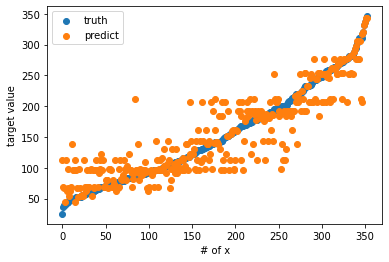

In [25]:
# 학습 데이터에 대한 타겟/예측 값 확인
plt.scatter(range(len(y_train)), y_train_sort, label='truth')
plt.scatter(range(len(y_train)), pred_train_sort, label='predict')
plt.xlabel('# of x')
plt.ylabel('target value')
plt.legend()
plt.show()

학습 데이터의 경우, 성능이 높았던 것처럼 실제 값과 유사하게 예측함

In [26]:
# 모델 예측 결과 확인을 위해 테스트의 타겟/예측 데이터 정렬
pred_test = regression_tree.predict(X_test)
test_sort_indices = y_test.values.reshape(-1).argsort()
y_test_sort = y_test.values[test_sort_indices]
pred_test_sort = pred_test[test_sort_indices]

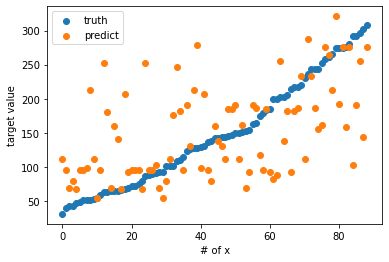

In [27]:
# 테스트 데이터에 대한 타겟/예측 값 확인
plt.scatter(range(len(y_test)), y_test_sort, label='truth')
plt.scatter(range(len(y_test)), pred_test_sort, label='predict')
plt.xlabel('# of x')
plt.ylabel('target value')
plt.legend()
plt.show()

- 성능이 낮았던 것처럼, 실제 값과 예측 값의 차이가 커보임
- 예측 값의 경향성이 보이지 않음
- 결정 트리가 데이터의 특징을 파악하지 못한 것으로 보임

### 특성 중요도 확인

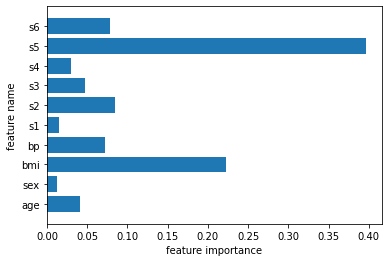

In [28]:
plot_feature_importance(diabetes_data, regression_tree)

모델 성능과 같이 보았을 때, 해당 특성 중요도는 의미가 없어 보임